## <font color='#2F4F4F'>1. Defining the Question</font>

### a) Specifying the Data Analysis Question

What is your research question? What problem is it that you are trying to solve?

 * Analysing TellCo data to assess whether it is worth buying 

*  Main aim is to identify opportunities to drive profitability by focusing on which products or services are being offered hence help the investor make informed decisions on the value of the company

### b) Defining the Metric for Success

What will convince you that your project has succeeded?

 *  metrics that show lot of potential for growth will prove that the TellCo is worth buying.

### c) Understanding the Context 

 * The background information surrounding the problem or research question.

### d) Recording the Experimental Design

 * The steps that I will take from the beginning to the end of this project have been highlighted below.

### e) Data Relevance

* Looking into the data to identify relevant variable to the research problem.

## <font color='#2F4F4F'>2. Data Cleaning & Preparation</font>

In [ ]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# to display all columns
pd.set_option('display.max.columns', None)

# to display the entire contents of a cell
pd.set_option('display.max_colwidth', None)

In [ ]:
# load and preview dataset
df = pd.read_csv('bank-additional-full.csv',delimiter=';')
df.sample(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
38292,56,admin.,married,basic.9y,no,no,no,cellular,oct,wed,79,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,no
15386,36,admin.,married,professional.course,no,no,no,cellular,jul,fri,262,1,999,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1,no
1963,38,technician,single,professional.course,no,yes,no,telephone,may,fri,166,3,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no


In [ ]:
# check dataset shape
df.shape

(41188, 21)

Our dataset has 41188 records and 21 variables.

In [ ]:
# preview variable datatypes
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [ ]:
# check for duplicates
df.duplicated().sum()

0

In [ ]:
df.drop_duplicates(keep=False,inplace=True) 

In [ ]:
# check for missing values
df.isna().sum().sum()
 

0

In [ ]:
for col in df.columns:
    print("Variable:", col)
    print("Number of unique values:", df[col].nunique())
    print(df[col].unique())
    print()

Variable: age
Number of unique values: 78
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]

Variable: job
Number of unique values: 12
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

Variable: marital
Number of unique values: 4
['married' 'single' 'divorced' 'unknown']

Variable: education
Number of unique values: 8
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

Variable: default
Number of unique values: 3
['no' 'unknown' 'yes']

Variable: housing
Number of unique values: 3
['no' 'yes' 'unknown']

Variable: loan
Number of unique values: 3
['no' 'yes' 'unknown']

Variable: contact
Number of unique values: 2
['telephone' 'cellular']


In [ ]:
categorical_features = df.select_dtypes(include=['object']).columns
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

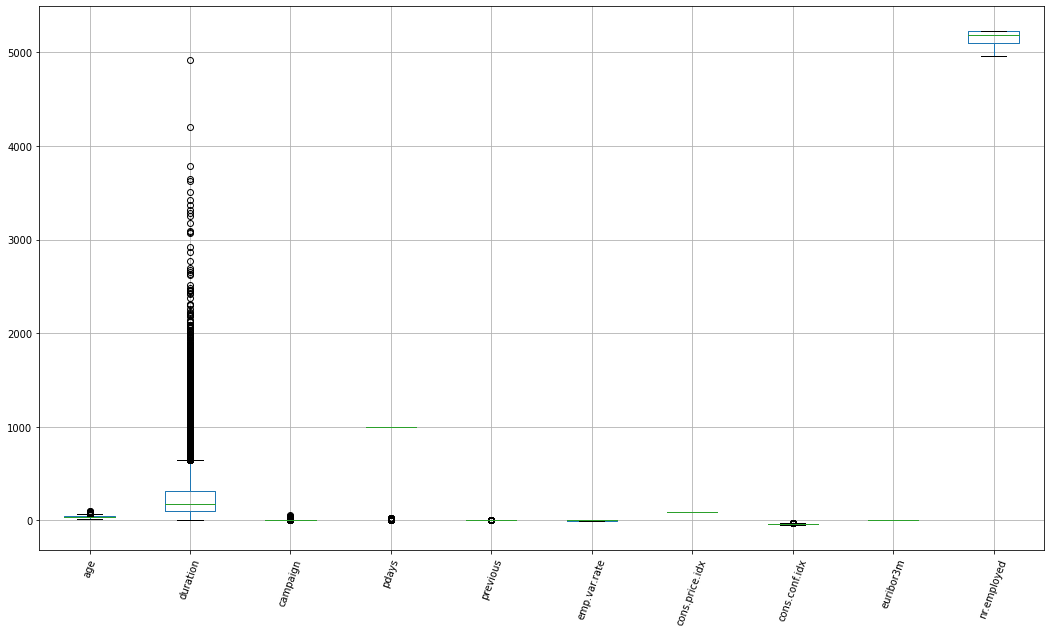

In [ ]:
# looking for outliers
box=numerical_features

# get the summary statistics

num_cols = box.to_list()


plt.figure(figsize = (18, 10))
df.boxplot(num_cols)
plt.xticks(rotation = 70)
plt.show()

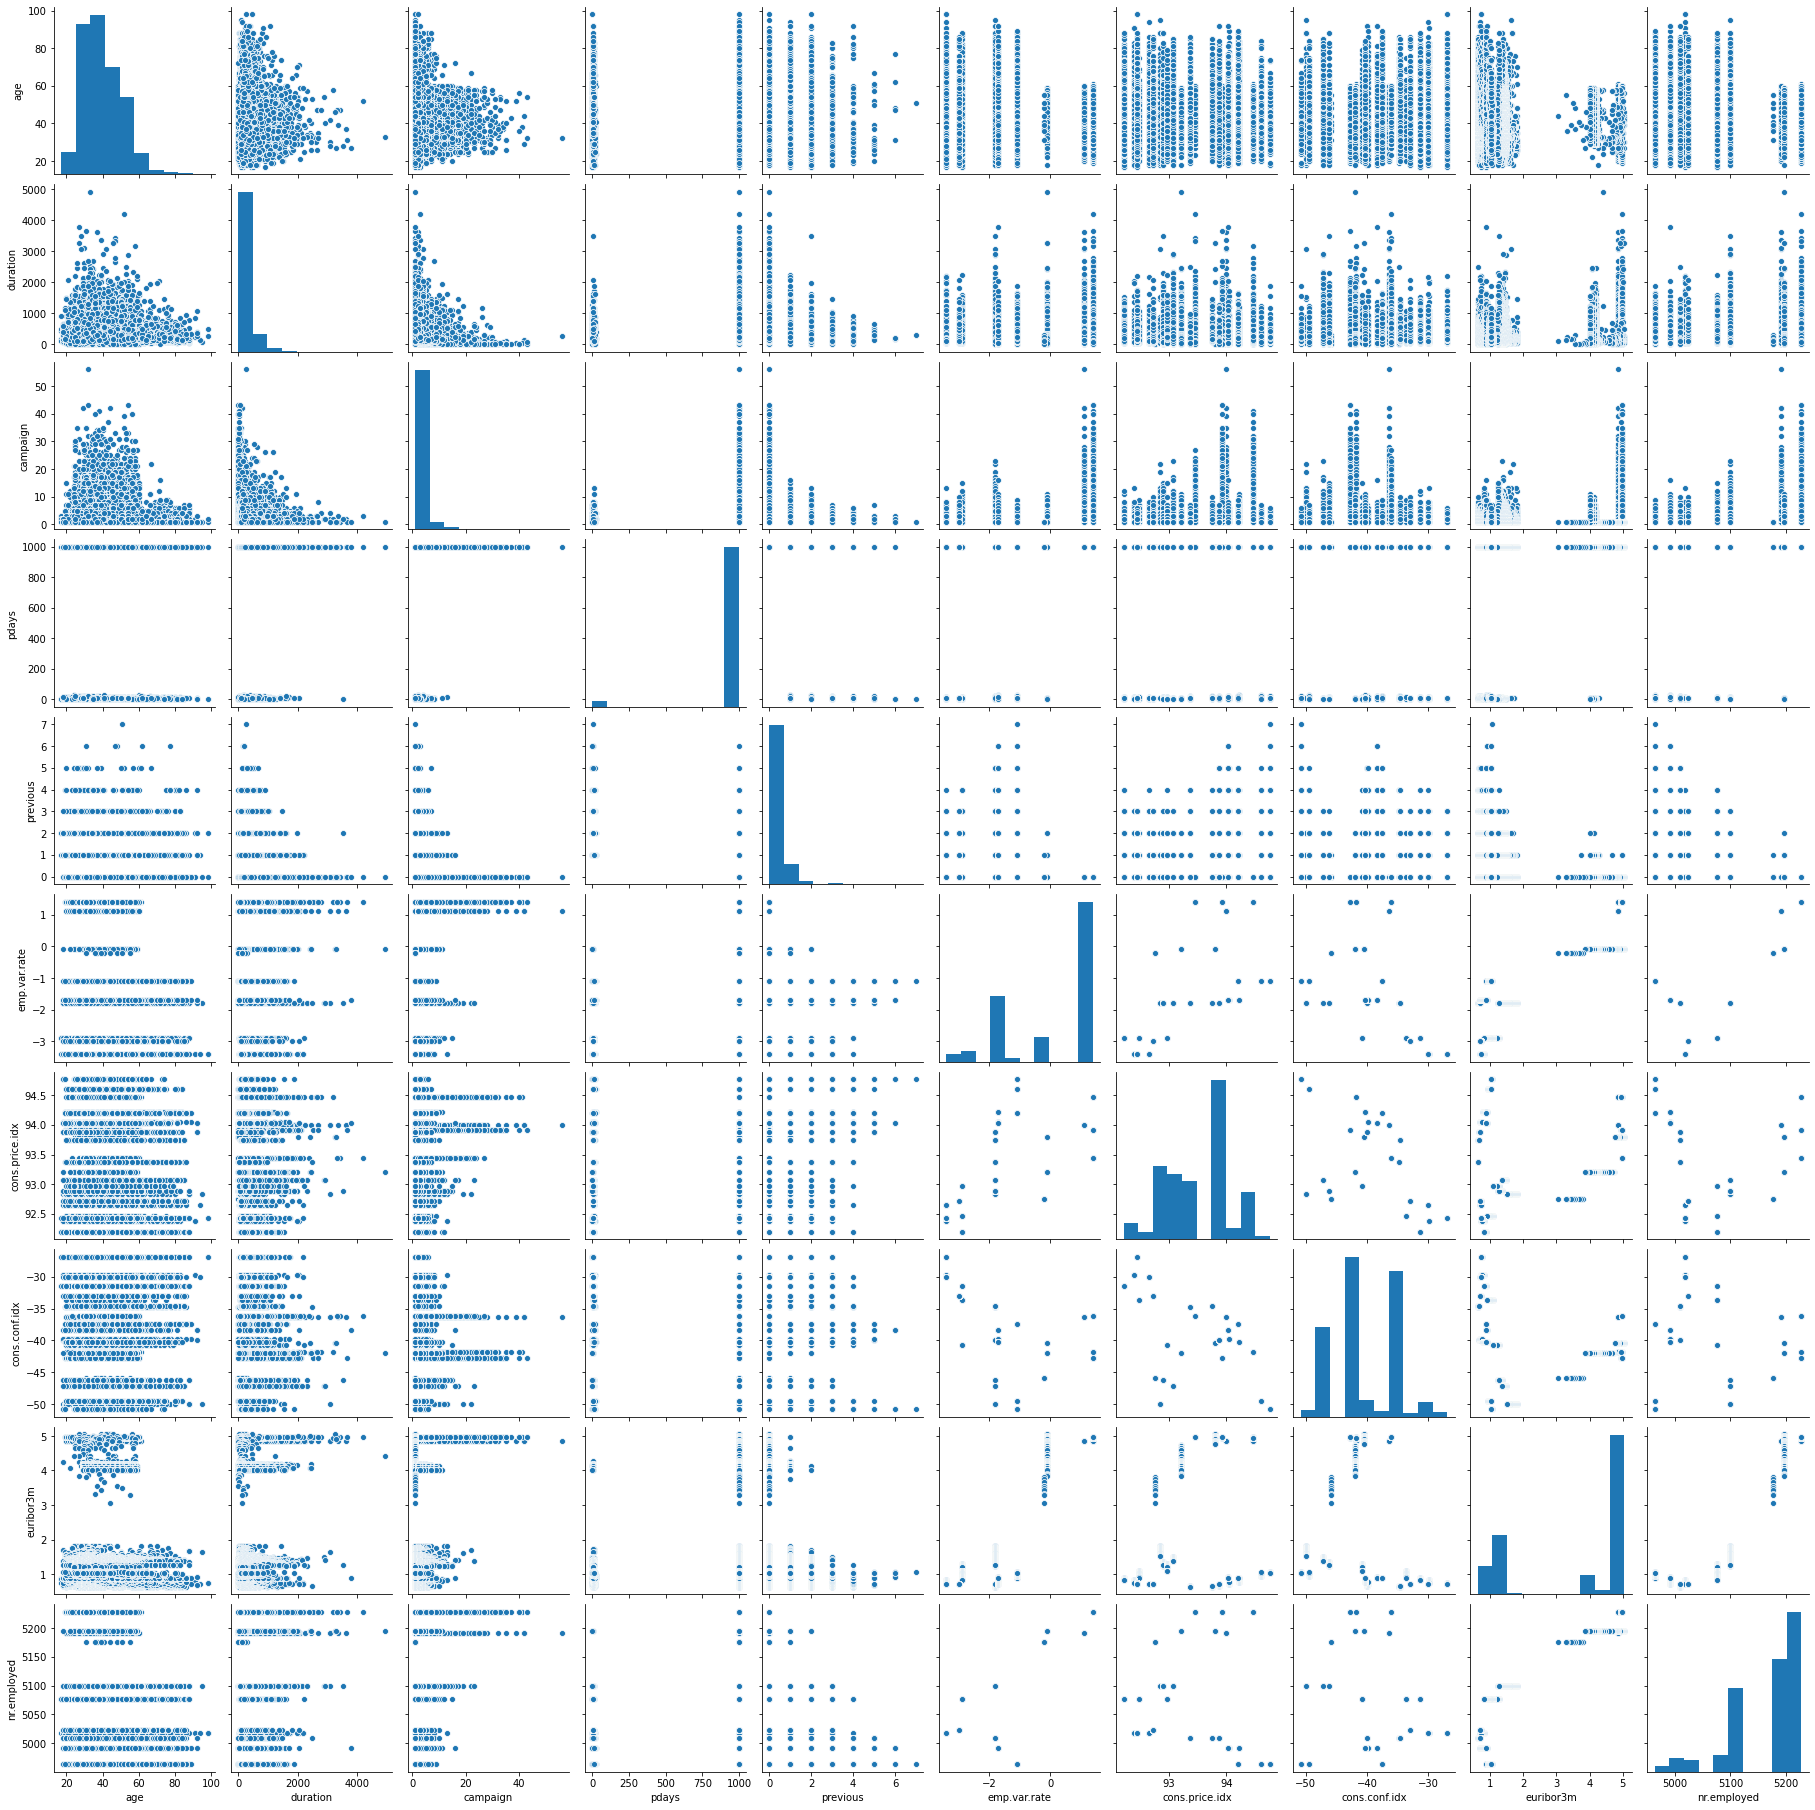

In [ ]:

sns.pairplot(df.select_dtypes(include=['float64', 'int64']))

## <font color='#2F4F4F'>3. Data Analysis</font>

### 3.1 Univariate Analysis

In [ ]:
# get the summary statistics

df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41164.000000,41164.000000,41164.000000,41164.000000,41164.000000,41164.000000,41164.000000,41164.000000,41164.000000,41164.000000
mean,40.023540,258.346638,2.568166,962.454159,0.173064,0.081958,93.575775,-40.503127,3.621296,5167.033828
std,10.420109,259.331402,2.770623,186.963307,0.495028,1.570805,0.578838,4.627522,1.734427,72.251200
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
df.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


**AGE**

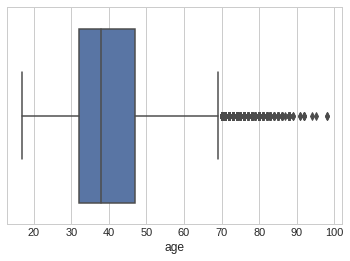

In [ ]:
sns.boxplot(x=df["age"])

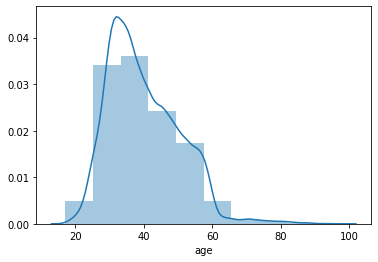

In [ ]:
sns.distplot(df['age'],hist=True, bins=10);

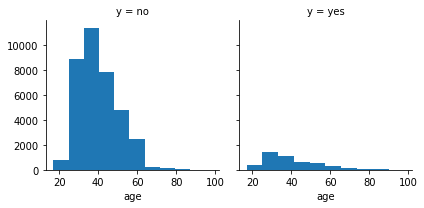

In [ ]:
g=sns.FacetGrid(df,col='y')
g.map(plt.hist,'age')

>>Highest number of people lie in the age bracket of [30-50]and majority of those in their 30's and 40's are more likely to say yes.


**JOB**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

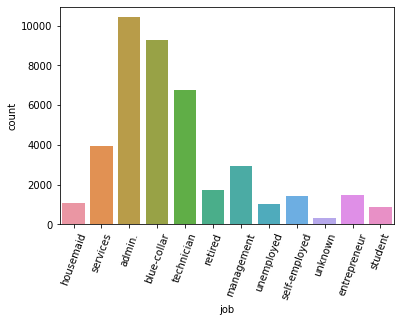

In [ ]:
sns.countplot(x='job',data=df)
plt.xticks(rotation=70)

>>majority of the people have admin,blue-collar and technician jobs

**MARITAL**

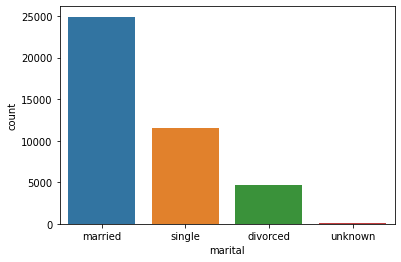

In [ ]:
sns.countplot(x='marital',data=df)

>>Majority of the people are married

**EDUCATION**

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

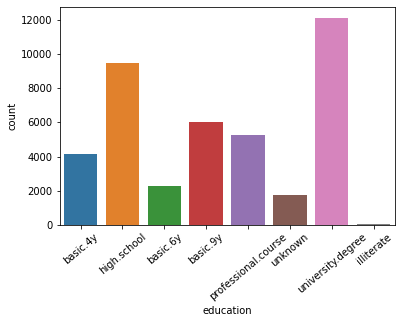

In [ ]:
sns.countplot(x='education',data=df)
plt.xticks(rotation=40)

>>Majority of the people have attained a university degree

**DEFAULT**

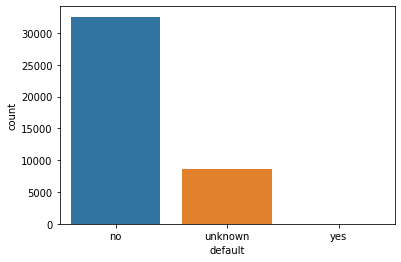

In [ ]:
sns.countplot(x='default',data=df)

>>Majority of the customers didn't default

**LOAN**

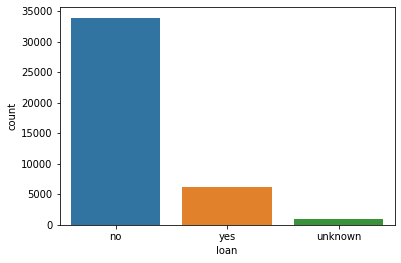

In [ ]:
sns.countplot(x='loan',data=df)

>>Majority of the customers do not have loans

**DEPOSIT**

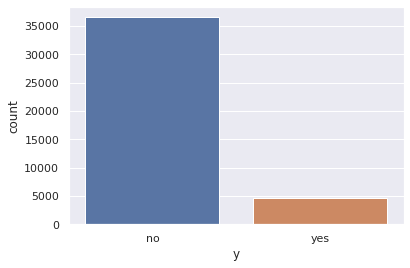

In [ ]:
sns.countplot(x='y',data=df)

>>>This is a classical class imbalance problem.



**DURATION**

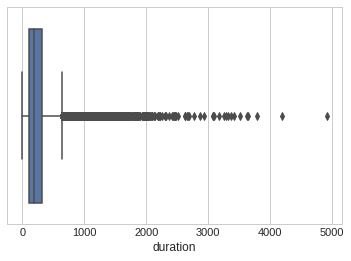

In [ ]:
sns.boxplot(x=df["duration"])

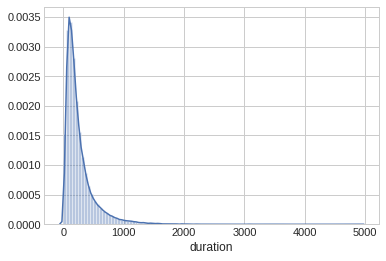

In [ ]:
sns.distplot(df.duration, bins=100)

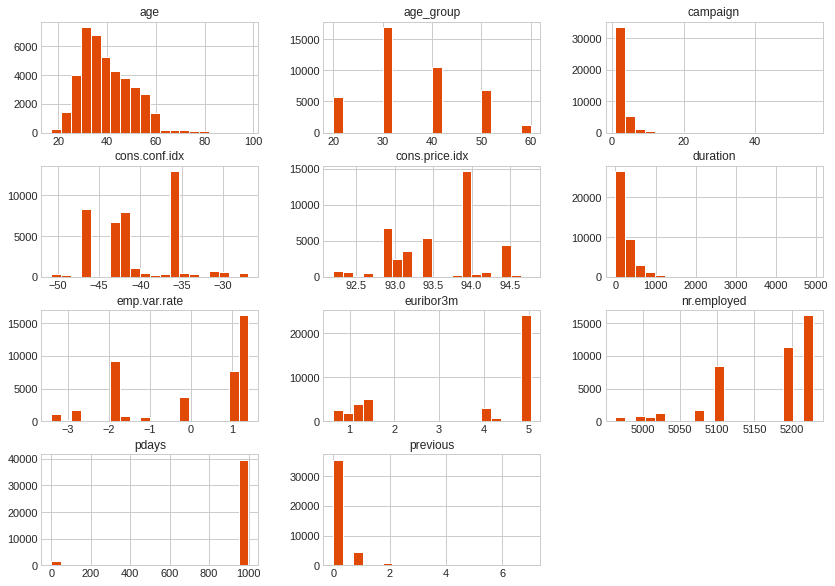

In [ ]:
plt.style.use('seaborn-whitegrid')

df.hist(bins=20, figsize=(14,10), color='#E14906')
plt.show()


### 3.2 Bivariate Analysis

* Explore the relationship between some variable using appropriate methods and interpret your
findings

In [ ]:
df.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.poutcome.unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

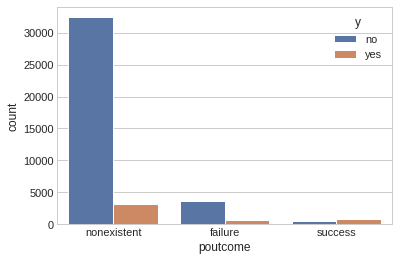

In [ ]:
sns.countplot(x="poutcome",hue="y",data=df)

553.1911637931034
220.84480682937507


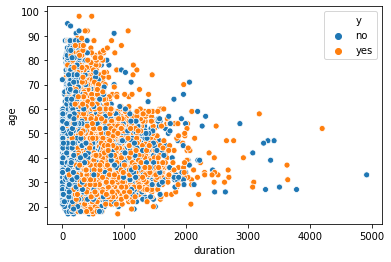

In [ ]:
yes=df[df['y']=='yes']
no=df[df['y']=='no']
print(yes['duration'].mean())
print(no['duration'].mean())

sns.scatterplot(df['duration'],df['age'],hue=df['y'])

>>duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

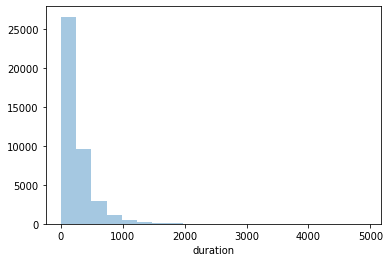

In [ ]:
sns.distplot(df['duration'],bins=20, kde=False)

In [ ]:
##Education
education=df['education'].value_counts().to_frame()
education

,education
university.degree,12168
high.school,9515
basic.9y,6045
professional.course,5243
basic.4y,4176
basic.6y,2292
unknown,1731
illiterate,18


In [ ]:
dataset_secondary=dataset[dataset['education']=='secondary']
dataset_tertiary=dataset[dataset['education']=='tertiary']
dataset_primary=dataset[dataset['education']=='primary']
dataset_unknown=dataset[dataset['education']=='unknown']

In [ ]:
yes_count=[]
yes_count.append(dataset_secondary[dataset_secondary['deposit']=='yes'].count()[1])
yes_count.append(dataset_tertiary[dataset_tertiary['deposit']=='yes'].count()[1])
yes_count.append(dataset_primary[dataset_primary['deposit']=='yes'].count()[1])
yes_count.append(dataset_unknown[dataset_unknown['deposit']=='yes'].count()[1])
education['Subscription count']=yes_count

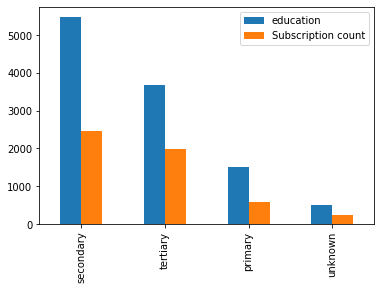

In [ ]:
education.plot(kind='bar')

In [ ]:
education['Percentage']=(education['Subscription count']/education['education'])*100
education.sort_values(by='Percentage',ascending=False)

,education,Subscription count,Percentage
tertiary,3689,1996,54.106804
unknown,497,252,50.704225
secondary,5476,2450,44.740687
primary,1500,591,39.400000


In [ ]:
#Month
df['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [ ]:

df.loc[df['month']=='mar','month']=3
df.loc[df['month']=='apr','month']=4
df.loc[df['month']=='may','month']=5
df.loc[df['month']=='jun','month']=6
df.loc[df['month']=='jul','month']=7
df.loc[df['month']=='aug','month']=8
df.loc[df['month']=='sep','month']=9
df.loc[df['month']=='oct','month']=10
df.loc[df['month']=='nov','month']=11
df.loc[df['month']=='dec','month']=12

In [ ]:
dict1=dict(list(df.groupby(['month','y'])))
list1=[3,4,5,6,7,8,9,10,11,12]
no=[]
yes=[]
months=[]
for i in list1:
  months.append(i)
  for j in ['no','yes']:
    if(j=='no'):
      no.append(dict1[i,j].count()['y'])
    else:
      yes.append(dict1[i,j].count()['y'])

total_count_per_month=[]
dict2=dict(list(df.groupby(['month'])))
for i in list1:
  total_count_per_month.append(dict2[i].count()['y'])

      
print(months)
print(total_count_per_month)
print(yes)
print(no)

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[546, 2632, 13769, 5318, 7174, 6178, 570, 718, 4101, 182]
[276, 539, 886, 559, 649, 655, 256, 315, 416, 89]
[270, 2093, 12883, 4759, 6525, 5523, 314, 403, 3685, 93]


In [ ]:
month_wise=pd.DataFrame()
month_wise['Months']=months
month_wise['Total ENteries per month']=total_count_per_month
month_wise['Count of Subscribed']=yes
month_wise['Count of Not Sub']=no
month_wise['Subscription Rate']=(month_wise['Count of Subscribed']/month_wise['Total ENteries per month'])*100
month_wise['Not Sub Rate']=(month_wise['Count of Not Sub']/month_wise['Total ENteries per month'])*100

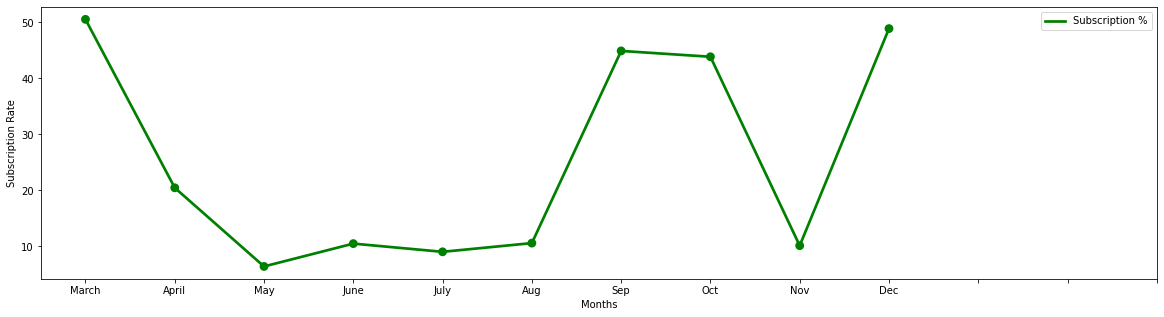

In [ ]:
plt.figure(figsize=(20,5))
labels=['March','April','May','June','July','Aug','Sep','Oct','Nov','Dec']
position=np.arange(0,13,1)
sns.pointplot(month_wise['Months'],month_wise['Subscription Rate'],color='g')
plt.xticks(position,labels)
plt.legend(['Subscription %'])

March has the highest subscription rate and May has the lowest


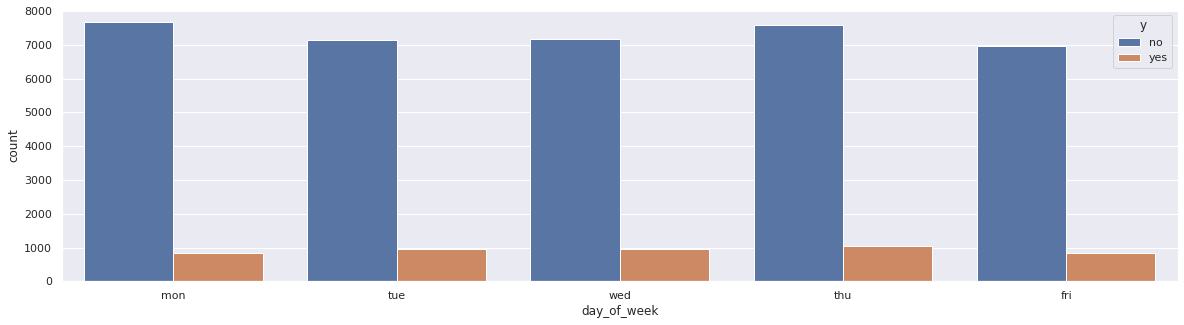

In [ ]:
#Days

plt.figure(figsize=(20,5))
sns.set(style='darkgrid')
sns.countplot(df['day_of_week'],hue=df['y'])

In [ ]:
df.loc[df['day_of_week']=='mon','day_of_week']= 1
df.loc[df['day_of_week']=='tue','day_of_week']=2
df.loc[df['day_of_week']=='wed','day_of_week']=3
df.loc[df['day_of_week']=='thu','day_of_week']=4
df.loc[df['day_of_week']=='fri','day_of_week']=5


In [ ]:
dict1=dict(list(df.groupby(['day_of_week','y'])))
list1=np.arange(1,6)
no=[]
yes=[]
days=[]
for i in list1:
  days.append(i)
  for j in ['no','yes']:
    if(j=='no'):
      no.append(dict1[i,j].count()['y'])
    else:
      yes.append(dict1[i,j].count()['y'])

total_count_per_day=[]
dict2=dict(list(df.groupby(['day_of_week'])))
for i in list1:
  total_count_per_day.append(dict2[i].count()['y'])

In [ ]:
day_wise=pd.DataFrame()
day_wise['Day']=days
day_wise['Total ENteries per day']=total_count_per_day
day_wise['Count of Subscribed']=yes
day_wise['Count of Not Sub']=no
day_wise['Subscription Rate']=(day_wise['Count of Subscribed']/day_wise['Total ENteries per day'])*100
day_wise['Not Sub Rate']=(day_wise['Count of Not Sub']/day_wise['Total ENteries per day'])*100
day_wise=day_wise.sort_values('Subscription Rate',ascending=False)

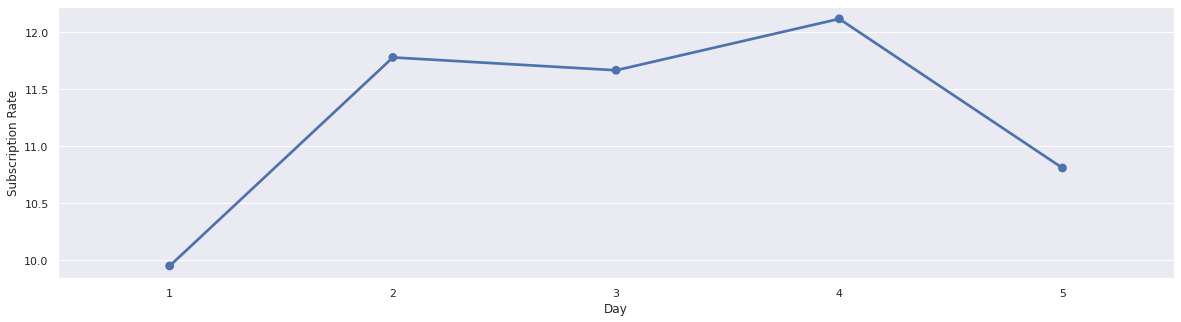

In [ ]:
plt.figure(figsize=(20,5))
sns.pointplot(day_wise['Day'],day_wise['Subscription Rate'])

1)Day 2(Tuesday),3(Wednesday) nd 4(Thursday) mark the high subscription rate

2)Days 1(Monday) and 5(Friday) are having lowest subscription rate

In [ ]:
## Job
count_job_response_pct = pd.crosstab(df['y'],df['job']).apply(lambda x: x/x.sum() * 100)
count_job_response_pct = count_job_response_pct.transpose()

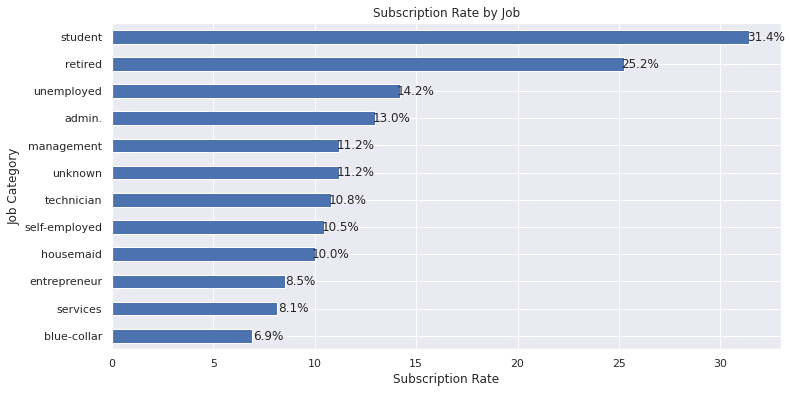

In [ ]:
plot_job = count_job_response_pct['yes'].sort_values(ascending = True).plot(kind ='barh',
                                                                           figsize = (12,6))
                                                                               
plt.title('Subscription Rate by Job')
plt.xlabel('Subscription Rate')
plt.ylabel('Job Category')

# Label each bar
for rec, label in zip(plot_job.patches,
                      count_job_response_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+0.8, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

In [ ]:
lst = [df]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60

In [ ]:
count_age_response_pct = pd.crosstab(df['y'],df['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose() 

In [ ]:
age = pd.DataFrame(df['age_group'].value_counts())
age['% Contacted'] = age['age_group']*100/age['age_group'].sum()
age['% Subscription'] = count_age_response_pct['yes']
age.drop('age_group',axis = 1,inplace = True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)

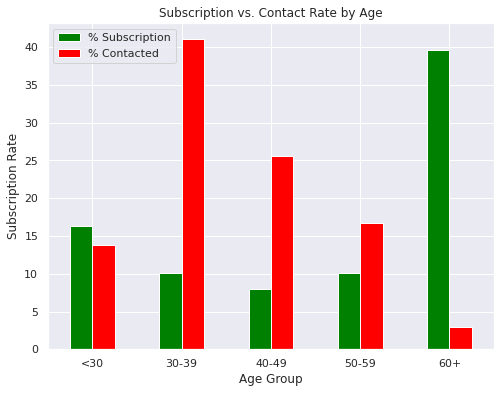

In [ ]:
plot_age = age[['% Subscription','% Contacted']].plot(kind = 'bar',
                                              figsize=(8,6), color = ('green','red'))
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Subscription vs. Contact Rate by Age')
plt.show()

As noted from the horizontal bar chart, students and retired clients account for more than 50% of subscription, which is consistent with the previous finding of higher subscription rates among the younger and older.

In [ ]:
df.housing.unique()

array(['no', 'yes', 'unknown'], dtype=object)

Total counts
We have  52.384189569777604  % who have house loan and count is  21576
We have  45.21219772749345  % who have dont house loan and count is  18622
We have  2.40361270272895  % who housing is unknown and count is  990


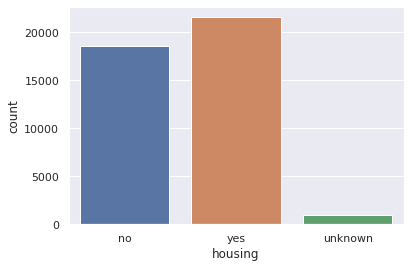

In [ ]:
##Housing and target
default_yes=df[df['housing']=='yes']
default_no=df[df['housing']=='no']
default_unknown=df[df['housing']=='unknown']

total=df.shape[0]
yes=default_yes.count()['y']
no=default_no.count()['y']
unknown=default_unknown.count()['y']
sns.countplot(df['housing'])

print("Total counts")
print("We have ",(yes/total)*100," % who have house loan and count is ", yes)
print("We have ",(no/total)*100," % who have dont house loan and count is ",no)
print("We have ",(unknown/total)*100," % who housing is unknown and count is ",unknown)

In [ ]:
yes=default_yes[default_yes['y']=='yes'].count()['y']
no=default_yes[default_yes['y']=='no'].count()['y']
total=default_yes.count()['y']
print("Total that have housing loan are",total)
print("Out of the total",(yes/total)*100," % have subscribed to Term Deposit Plan")
print("Out of the total",(no/total)*100," % have not subscribed to Term Deposit Plan")

Total that have housing loan are 21576
Out of the total 11.619391916944753  % have subscribed to Term Deposit Plan
Out of the total 88.38060808305525  % have not subscribed to Term Deposit Plan


In [ ]:
yes=default_no[default_no['y']=='yes'].count()['y']
no=default_no[default_no['y']=='no'].count()['y']
total=default_no.count()['y']
print("Total number of people that don't housing loan are",total)
print("Out of the total",(yes/total)*100," % have subscribed to Term Deposit Plan")
print("Out of the total",(no/total)*100," % have not subscribed to Term Deposit Plan")

Total number of people that don't housing loan are 18622
Out of the total 10.879604768553323  % have subscribed to Term Deposit Plan
Out of the total 89.12039523144668  % have not subscribed to Term Deposit Plan


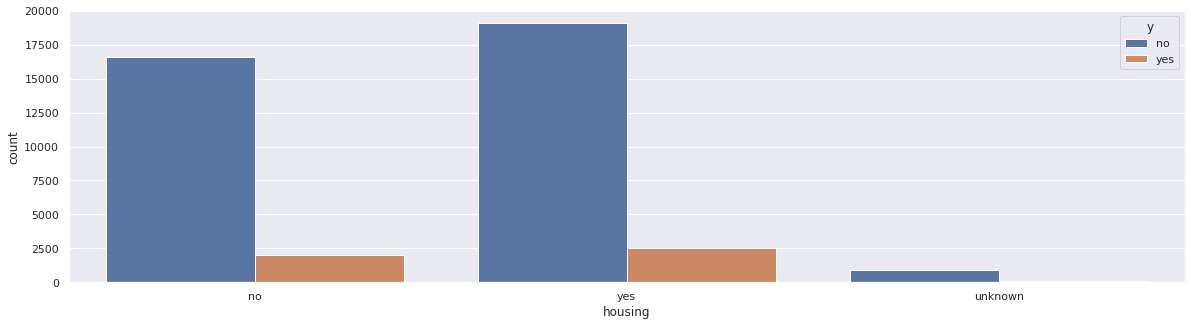

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(df['housing'],hue=df['y'])

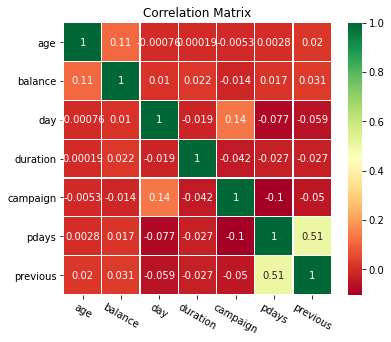

In [ ]:
#correlation Overview

corr_data = dataset[['age','balance','duration','campaign','month','previous','deposit']]
corr = dataset.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(6,5)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

1.The analysis points out that March, September, October and December had the highest success rates. Nevertheless, more data should be collected and analyzed to make sure that this seasonal effect is constant over time. If the trend has the potential to continue in the future, the bank should consider initiating its telemarketing campaign in fall and spring.

2.With a more granular understanding of its customer base, the bank has the ability to provide better banking services. For example,  occupation reveal a customer's life stage while loan status indicates his/her overall risk profile. With this information, the bank can estimate when a customer might need to make an investment. In this way, the bank can better satisfy its customer demand by providing banking services for the right customer at the right time.

As noted from the horizontal bar chart, students and retired clients account for more than 50% of subscription, which is consistent with the previous finding of higher subscription rates among the younger and older.


3.There are more clients who don't have a housing loan and have subscribed to Term Deposit Plan.

We have 44.41% of people who don't have housing loan and out of that 16.70% people have subscribed to Term Deposit plan.


### 3.3 Variable Transformation


* segment the users into top five decile classes
based on the total duration for all sessions and compute the total data
(DL+UL) per decile class.

In [ ]:
decile_df=df.groupby('MSISDN/Number').agg({'Dur. (ms)':'sum','Total_DL_UL':'sum'}).sort_values(by='Dur. (ms)',ascending=False).reset_index()

In [ ]:
decile_df['decile']=pd.qcut(decile_df['Dur. (ms)'], q=10, precision=0)

In [ ]:
decile_df.head(5)

,MSISDN/Number,Dur. (ms),Total_DL_UL,decile
0,3.362578e+10,18553754.0,1.459155e+09,"(276286.0, 18553754.0]"
1,3.361489e+10,9966898.0,1.378966e+09,"(276286.0, 18553754.0]"
2,3.376054e+10,9279434.0,1.406957e+09,"(276286.0, 18553754.0]"
3,3.362632e+10,8791927.0,1.339301e+09,"(276286.0, 18553754.0]"
4,3.366716e+10,8744914.0,1.132653e+09,"(276286.0, 18553754.0]"


### 3.3 Correlation Analysis

* compute a correlation matrix for the following
variables and interpret your findings: Social Media data, Google data, Email
data, Youtube data, Netflix data, Gaming data, Other data

In [ ]:
# checking the correlations between the numerical variables

corr = df.corr()

# plotting the correlations onto a heatmap
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

### 3.3 Dimensionality Reduction


* perform a principal component analysis to
reduce the dimensions of your data and provide a useful interpretation of
the results 

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
%matplotlib inline



#convert it to numpy arrays
X=df.values

#Scaling the values
X = scale(X)

pca = PCA(n_components=44)

pca.fit(X)

#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

print(var1)
plt.plot(var1)

### 3.3 Non  graphical Univariate analysis

*  For each of the above variables
describing the customers, report in a table the minimum value, the maximum
value, the average, the 1st, 2nd & 3rd quartile and provide useful interpretations

In [ ]:
df1=df.groupby('MSISDN/Number').agg({'Bearer Id':'count'}).reset_index()
df1.head(5)

,MSISDN/Number,Bearer Id
0,3.360100e+10,1
1,3.360100e+10,1
2,3.360100e+10,1
3,3.360101e+10,1
4,3.360101e+10,2


In [ ]:
df1.describe()

,MSISDN/Number,Bearer Id
count,1.063520e+05,106352.000000
mean,4.516896e+10,1.394859
std,2.896261e+12,0.806716
min,3.360100e+10,1.000000
25%,3.365088e+10,1.000000
50%,3.366365e+10,1.000000
75%,3.368344e+10,2.000000
max,8.823970e+14,18.000000


In [ ]:
df2=df.groupby('MSISDN/Number').agg({'Dur. (ms)':'sum'}).reset_index()
df2.head(5)

,MSISDN/Number,Dur. (ms)
0,3.360100e+10,116720.0
1,3.360100e+10,181230.0
2,3.360100e+10,134969.0
3,3.360101e+10,49878.0
4,3.360101e+10,37104.0


In [ ]:
df2.describe()

,MSISDN/Number,Dur. (ms)
count,1.063520e+05,1.063520e+05
mean,4.516896e+10,1.466406e+05
std,2.896261e+12,1.861168e+05
min,3.360100e+10,7.142000e+03
25%,3.365088e+10,7.272950e+04
50%,3.366365e+10,1.032470e+05
75%,3.368344e+10,1.727990e+05
max,8.823970e+14,1.855375e+07


In [ ]:
df3=df.groupby('MSISDN/Number').agg({'Total UL (Bytes)':'count'}).reset_index()
df3.describe()

,MSISDN/Number,Total UL (Bytes)
count,1.063520e+05,106352.000000
mean,4.516896e+10,1.394859
std,2.896261e+12,0.806716
min,3.360100e+10,1.000000
25%,3.365088e+10,1.000000
50%,3.366365e+10,1.000000
75%,3.368344e+10,2.000000
max,8.823970e+14,18.000000


In [ ]:
df4=df.groupby('MSISDN/Number').agg({'Total DL (Bytes)':'count'}).reset_index()
df4.describe()

,MSISDN/Number,Total DL (Bytes)
count,1.063520e+05,106352.000000
mean,4.516896e+10,1.394859
std,2.896261e+12,0.806716
min,3.360100e+10,1.000000
25%,3.365088e+10,1.000000
50%,3.366365e+10,1.000000
75%,3.368344e+10,2.000000
max,8.823970e+14,18.000000


## <font color='#2F4F4F'>5. Summary of Findings</font>

Include your findings from the analysis and modeling stages.

The data is biased as many customers had not churned hence this may corrupt our model.

## <font color='#2F4F4F'>6. Recommendations</font>

What recommendations can you provide?
Those who do not use the international plan and live in area code 415 carry a high percentage of thsoe who churned,hence such people are most likely to churn and should be targeted.

## <font color='#2F4F4F'>7. Challenging your Solution</font>

What can you do to improve your project?

Some hyperparameter tuning and cross-validation techniques can be doen to improve the performance of the models.